In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from xgboost import XGBRegressor, XGBClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [6]:
# Load the datasets
df_2023 = pd.read_csv('employee-compensation-2023 (1).csv')
df_2022 = pd.read_csv('employee-compensation-2022 (1).csv')

In [7]:
df_2021 = pd.read_csv('employee-compensation-2021 (1).csv', encoding='ISO-8859-1')
df_2020 = pd.read_csv('employee-compensation-2020 (1).csv', encoding='ISO-8859-1')
df_2019 = pd.read_csv('employee-compensation-2019 (1).csv', encoding='ISO-8859-1')
df_2018 = pd.read_csv('employee-compensation-2018 (1).csv', encoding='ISO-8859-1')
df_2017 = pd.read_csv('employee-compensation-2017 (1).csv', encoding='ISO-8859-1')

In [8]:
# Add year columns
df_2023['Year'] = 2023
df_2022['Year'] = 2022
df_2021['Year'] = 2021
df_2020['Year'] = 2020
df_2019['Year'] = 2019
df_2018['Year'] = 2018
df_2017['Year'] = 2017

In [10]:
# Rename Job Title columns
df_2023.rename(columns={'Job Title (as of 12/31/23)': 'Job Title'}, inplace=True)
df_2022.rename(columns={'Job Title (as of 12/31/22)': 'Job Title'}, inplace=True)
df_2021.rename(columns={'Job Title (as of 12/31/21)': 'Job Title'}, inplace=True)
df_2020.rename(columns={'Job Title (as of 12/31/20)': 'Job Title'}, inplace=True)
df_2019.rename(columns={'Job Title (as of 12/31/19)': 'Job Title'}, inplace=True)
df_2018.rename(columns={'Job Title (as of 12/31/18)': 'Job Title'}, inplace=True)
df_2017.rename(columns={'Job Title (as of 12/31/17)': 'Job Title'}, inplace=True)

In [11]:
def clean_and_analyze_dataframe(df):
    # Print the dimensions of the dataframe before cleaning
    dimensions = df.shape
    print(f"Number of rows: {dimensions[0]}")
    print(f"Number of columns: {dimensions[1]}")

    if 'Retirement Contributions (Normal Cost) - City Paid*' in df.columns:
        df.rename(columns={'Retirement Contributions (Normal Cost) - City Paid*': 'Retirement Contributions (Normal Cost) - City Paid'}, inplace=True)


    # Drop specified columns
    columns_to_drop = [
        'Name', 'Department', 'Sick and Vacation Payouts', 'Other Cash Compensation',
        'Defined Contribution Plan Contributions - City Paid', 'Medical Dental Vision',
        'Retirement Contributions (Normal Cost) - City Paid',
        'Long Term Disability, Life, Medicare', 'Misc Employment Related Costs'
    ]
    df.drop(columns_to_drop, axis=1, inplace=True)

    # Define the columns to clean and convert to float
    columns_to_clean = [
        'Total Cash Compensation', 'Base Pay', 'Overtime'
    ]

    # Remove commas, dollar signs, and spaces, and convert columns to float
    for column in columns_to_clean:
        df[column] = df[column].astype(str).str.replace('[\$,]', '', regex=True).str.strip()
        df[column] = pd.to_numeric(df[column], errors='coerce')

    # Verify the data type of each column
    data_types = df[columns_to_clean].dtypes
    print("Data types after cleaning:")
    print(data_types)

    # Check for missing values in the dataframe
    missing_values_count = df.isnull().sum()
    print("Missing values in each column before dropping NaNs:")
    print(missing_values_count)

    # Remove rows where 'Base Pay' is NaN or less than or equal to 0
    df_cleaned = df.dropna(subset=['Base Pay'])
    df_cleaned = df_cleaned[df_cleaned['Base Pay'] > 0]

    # Fill missing values in 'Overtime' column with 0
    df_cleaned['Overtime'].fillna(0, inplace=True)

    # Check for missing values after cleaning
    missing_values_count = df_cleaned.isnull().sum()
    print("Missing values in each column after cleaning:")
    print(missing_values_count)

    # Calculate the hourly rate and add it as a new column 'HourlyRate'
    df_cleaned['HourlyRate'] = df_cleaned['Base Pay'] / (40 * 52)

    # Count the number of rows where 'HourlyRate' is 0
    num_hourly_rate_zero = (df_cleaned['HourlyRate'] == 0).sum()
    print(f"Number of rows where HourlyRate is 0: {num_hourly_rate_zero}")

    # Calculate the hours worked as overtime and add it as a new column 'Hours Worked Overtime'
    df_cleaned['Hours Worked Overtime'] = df_cleaned['Overtime'] / df_cleaned['HourlyRate']

    # Calculate the 45th and 80th percentiles of 'Hours Worked Overtime'
    percentile_45 = df_cleaned['Hours Worked Overtime'].quantile(0.45)
    percentile_80 = df_cleaned['Hours Worked Overtime'].quantile(0.80)

    # Categorize based on the percentiles
    def categorize_overtime_likelihood_level(hours):
        if hours < percentile_45:
            return 'Low overtime_likelihood'
        elif hours <= percentile_80:
            return 'Medium overtime_likelihood'
        else:
            return 'High overtime_likelihood'

    # Apply the categorization function
    df_cleaned['overtime_likelihood Level'] = df_cleaned['Hours Worked Overtime'].apply(categorize_overtime_likelihood_level)

    # Display the counts for 'High overtime_likelihood', 'Medium overtime_likelihood', and 'Low overtime_likelihood'
    overtime_likelihood_level_counts = df_cleaned['overtime_likelihood Level'].value_counts()
    print("overtime_likelihood Level counts:")
    print(overtime_likelihood_level_counts)

    # df_cleaned['overtime_likelihood Index'] = (df_cleaned['Hours Worked Overtime'] / df_cleaned['Base Pay']) + df_cleaned['Hours Worked Overtime']




    return df_cleaned

In [12]:
df_2023_cleaned = clean_and_analyze_dataframe(df_2023)
df_2022_cleaned = clean_and_analyze_dataframe(df_2022)
df_2021_cleaned = clean_and_analyze_dataframe(df_2021)
df_2020_cleaned = clean_and_analyze_dataframe(df_2020)
df_2019_cleaned = clean_and_analyze_dataframe(df_2019)
df_2018_cleaned = clean_and_analyze_dataframe(df_2018)
df_2017_cleaned = clean_and_analyze_dataframe(df_2017)


Number of rows: 8646
Number of columns: 14
Data types after cleaning:
Total Cash Compensation    float64
Base Pay                   float64
Overtime                   float64
dtype: object
Missing values in each column before dropping NaNs:
Job Title                     0
Total Cash Compensation       0
Base Pay                     65
Overtime                   3831
Year                          0
dtype: int64
Missing values in each column after cleaning:
Job Title                  0
Total Cash Compensation    0
Base Pay                   0
Overtime                   0
Year                       0
dtype: int64
Number of rows where HourlyRate is 0: 0
overtime_likelihood Level counts:
overtime_likelihood Level
Low overtime_likelihood       3855
Medium overtime_likelihood    2998
High overtime_likelihood      1713
Name: count, dtype: int64
Number of rows: 8475
Number of columns: 14
Data types after cleaning:
Total Cash Compensation    float64
Base Pay                   float64
Overtime   

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df_combined = pd.concat([df_2023_cleaned, df_2022_cleaned, df_2021_cleaned, df_2020_cleaned, df_2019_cleaned, df_2018_cleaned, df_2017_cleaned], ignore_index=True)


In [14]:
df_combined.shape

(58006, 8)

In [15]:
missing_values_count = df_combined.isnull().sum()

# Display the result
print(missing_values_count)

Job Title                    0
Total Cash Compensation      0
Base Pay                     0
Overtime                     0
Year                         0
HourlyRate                   0
Hours Worked Overtime        0
overtime_likelihood Level    0
dtype: int64


In [16]:
job_title_counts = df_combined['Job Title'].value_counts()
print("Unique job titles and their counts:")
print(job_title_counts)

Unique job titles and their counts:
Job Title
Police Officer                    6098
Recreation Leader PT              5439
Fire Fighter                      1643
School Crossing Guard PT          1643
Fire Engineer                     1595
                                  ... 
Reg Wastewater Fac Gen Mgr U         1
Council ComnRel Director U PT        1
Literacy Program Specialist PT       1
Assist City Auditor U                1
Real Estate Specialist               1
Name: count, Length: 637, dtype: int64


In [17]:
df_combined.head()

,Job Title,Total Cash Compensation,Base Pay,Overtime,Year,HourlyRate,Hours Worked Overtime,overtime_likelihood Level
0,Fire Captain,620986.55,180574.29,436373.06,2023,86.814563,5026.496102,High overtime_likelihood
1,Fire Captain,505127.13,180574.29,309358.34,2023,86.814563,3563.438334,High overtime_likelihood
2,Police Lieutenant,457417.50,201148.00,218841.40,2023,96.705769,2262.961163,High overtime_likelihood
3,Fire Engineer,453006.39,157370.85,291596.34,2023,75.659063,3854.083442,High overtime_likelihood
4,Fire Engineer,446067.98,157370.85,287852.25,2023,75.659063,3804.597103,High overtime_likelihood


In [18]:
# Remove rows where 'Job Title' ends with ' U'
df_combined = df_combined[~df_combined['Job Title'].str.contains(r' U| U ', na=False)]

In [19]:
df_combined.head()

,Job Title,Total Cash Compensation,Base Pay,Overtime,Year,HourlyRate,Hours Worked Overtime,overtime_likelihood Level
0,Fire Captain,620986.55,180574.29,436373.06,2023,86.814563,5026.496102,High overtime_likelihood
1,Fire Captain,505127.13,180574.29,309358.34,2023,86.814563,3563.438334,High overtime_likelihood
2,Police Lieutenant,457417.50,201148.00,218841.40,2023,96.705769,2262.961163,High overtime_likelihood
3,Fire Engineer,453006.39,157370.85,291596.34,2023,75.659063,3854.083442,High overtime_likelihood
4,Fire Engineer,446067.98,157370.85,287852.25,2023,75.659063,3804.597103,High overtime_likelihood


In [21]:
# from google.colab import files

df_combined.to_csv('df_combined.csv', index = False)
# files.download('df_combined.csv')

In [22]:
job_title_counts = df_combined['Job Title'].value_counts()
# job_titles_more_than_100 = job_title_counts[job_title_counts > 100]
# print(job_titles_more_than_100)

job_titles_more_than_100 = job_title_counts[job_title_counts > 100].index
df_filtered = df_combined[df_combined['Job Title'].isin(job_titles_more_than_100)]


df_filtered.to_csv('df_filtered.csv', index = False)
# files.download('df_filtered.csv')

In [23]:
df_filtered

df_filtered.shape

(41753, 8)

In [24]:
# Create sample dataset
# data = df_filtered
data = pd.read_csv("df_filtered.csv") 

# Load the inflation data
inflation_data = pd.read_excel('inflationData.xlsx')

# Extract the numeric inflation data starting from row 12 onward
inflation_data_cleaned = inflation_data.iloc[11:, :].reset_index(drop=True)

# Rename the columns to make them more accessible
columns = inflation_data_cleaned.iloc[0]
inflation_data_cleaned.columns = columns
inflation_data_cleaned = inflation_data_cleaned.iloc[1:].reset_index(drop=True)

# Convert the year columns to numeric, and drop any non-numeric rows
inflation_data_cleaned = inflation_data_cleaned.apply(pd.to_numeric, errors='coerce')
inflation_data_cleaned = inflation_data_cleaned.dropna().reset_index(drop=True)

# Calculate the average annual inflation rate for each year
inflation_data_cleaned['Average Inflation'] = inflation_data_cleaned.iloc[:, 1:].mean(axis=1)

# Extract year and average inflation for integration into the model
inflation_rates = inflation_data_cleaned[['Year', 'Average Inflation']]

# Merge the inflation rates with the original dataset
data = data.merge(inflation_rates, left_on='Year', right_on='Year', how='left')

# Display the first few rows of the dataset
print("Dataset Preview:")
display(data.head())

Dataset Preview:


/Users/mac/Desktop/cmpe255_project/env/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Job Title,Total Cash Compensation,Base Pay,Overtime,Year,HourlyRate,Hours Worked Overtime,overtime_likelihood Level,Average Inflation
0,Fire Captain,620986.55,180574.29,436373.06,2023,86.814563,5026.496102,High overtime_likelihood,0.383333
1,Fire Captain,505127.13,180574.29,309358.34,2023,86.814563,3563.438334,High overtime_likelihood,0.383333
2,Police Lieutenant,457417.50,201148.00,218841.40,2023,96.705769,2262.961163,High overtime_likelihood,0.383333
3,Fire Engineer,453006.39,157370.85,291596.34,2023,75.659063,3854.083442,High overtime_likelihood,0.383333
4,Fire Engineer,446067.98,157370.85,287852.25,2023,75.659063,3804.597103,High overtime_likelihood,0.383333


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

class CompensationPredictor:
    def __init__(self):
        self.comp_model = RandomForestRegressor(random_state=42)
        self.trend_model = LinearRegression()
        self.poly = PolynomialFeatures(degree=2)  # Using polynomial regression for non-linear trends
        self.overtime_likelihood_model = RandomForestClassifier(random_state=42)
        self.scaler = StandardScaler()
        self.job_title_encoder = LabelEncoder()
        self.overtime_likelihood_encoder = LabelEncoder()

    def prepare_data(self, data):
        """Prepare the dataset for training"""
        # Encode Job Title as a numerical feature
        data['Job Title Encoded'] = self.job_title_encoder.fit_transform(data['Job Title'])

        # Create features (Job Title, Year, and Inflation)
        features = data[['Job Title Encoded', 'Year', 'Average Inflation']].copy()

        # Create targets
        comp_target = data['Total Cash Compensation']
        overtime_likelihood_target = self.overtime_likelihood_encoder.fit_transform(data['overtime_likelihood Level'])

        # Scale features except Year (keeping the original Year feature)
        scaled_features = features.copy()
        scaled_features[['Job Title Encoded', 'Average Inflation']] = self.scaler.fit_transform(
            features[['Job Title Encoded', 'Average Inflation']]
        )

        return scaled_features, features['Year'], comp_target, overtime_likelihood_target

    def train(self, data):
        """Train both compensation and overtime_likelihood level models"""
        # Prepare data
        X, years, y_comp, y_overtime_likelihood = self.prepare_data(data)

        # Apply polynomial transformation to the Year feature for trend analysis
        years_poly = self.poly.fit_transform(years.values.reshape(-1, 1))

        # Train trend model (polynomial regression for year vs. compensation)
        self.trend_model.fit(years_poly, y_comp)

        # Add trend predictions as a feature to X
        trend_predictions = self.trend_model.predict(years_poly)
        X_with_trend = np.hstack((X, trend_predictions.reshape(-1, 1)))

        # Split data
        X_train, X_test, y_comp_train, y_comp_test, y_overtime_likelihood_train, y_overtime_likelihood_test = train_test_split(
            X_with_trend, y_comp, y_overtime_likelihood, test_size=0.2, random_state=42
        )

        # Train compensation model
        self.comp_model.fit(X_train, y_comp_train)
        comp_pred = self.comp_model.predict(X_test)
        comp_rmse = np.sqrt(mean_squared_error(y_comp_test, comp_pred))

        # Train overtime_likelihood level model
        self.overtime_likelihood_model.fit(X_train, y_overtime_likelihood_train)
        overtime_likelihood_pred = self.overtime_likelihood_model.predict(X_test)
        overtime_likelihood_report = classification_report(y_overtime_likelihood_test, overtime_likelihood_pred)

        return {
            'compensation_rmse': comp_rmse,
            'overtime_likelihood_classification_report': overtime_likelihood_report
        }

    def predict(self, job_title, year, inflation=None):
        """Make predictions for new data based on job title, year, and inflation"""
        # Encode the job title input
        job_title_encoded = self.job_title_encoder.transform([job_title])[0]

        # If inflation is not provided, use the most recent available inflation rate
        if inflation is None:
            inflation = inflation_rates[inflation_rates['Year'] == inflation_rates['Year'].max()]['Average Inflation'].values[0]

        # Apply polynomial transformation to the Year feature for trend prediction
        year_poly = self.poly.transform([[year]])

        # Predict trend for the given year using polynomial regression
        trend_pred = self.trend_model.predict(year_poly)

        # Prepare input data with trend prediction as a feature
        input_data = np.array([[job_title_encoded, year, inflation]])
        scaled_input = input_data.copy()
        scaled_input[:, [0, 2]] = self.scaler.transform(input_data[:, [0, 2]])
        input_with_trend = np.hstack((scaled_input, trend_pred.reshape(-1, 1)))

        # Make predictions using RandomForest
        rf_pred = self.comp_model.predict(input_with_trend)[0]

        # Combine the trend prediction and RandomForest prediction with dynamic weighting
        final_pred = 0.3 * trend_pred[0] + 0.7 * rf_pred  # Adjust weights as necessary to give more influence to RandomForest

        # Predict overtime_likelihood level
        overtime_likelihood_pred = self.overtime_likelihood_model.predict(input_with_trend)[0]
        overtime_likelihood_label = self.overtime_likelihood_encoder.inverse_transform([overtime_likelihood_pred])[0]

        return {
            'predicted_compensation': final_pred,
            'predicted_overtime_likelihood_level': overtime_likelihood_label
        }

# Initialize and train the hybrid model
predictor = CompensationPredictor()
metrics = predictor.train(data)

print("\nModel Performance Metrics:")
print(f"Compensation RMSE: ${metrics['compensation_rmse']:.2f}")
print("\novertime_likelihood Level Classification Report:")
print(metrics['overtime_likelihood_classification_report'])

# Make a prediction for 2025 with inflation value
inflation_rate = inflation_rates[inflation_rates['Year'] == 2023]['Average Inflation'].values[0]  # Use the latest inflation rate as a proxy
prediction = predictor.predict(
    job_title='Police Lieutenant',
    year=2022,
    inflation=inflation_rate
)

print("\nPrediction for 2025:")
print(f"Predicted Compensation: ${prediction['predicted_compensation']:.2f}")
print(f"Predicted overtime_likelihood Level: {prediction['predicted_overtime_likelihood_level']}")

# Create a function to make interactive predictions
def make_prediction():
    job_title = input("Enter job title (e.g., Fire Captain): ")
    year = int(input("Enter year (e.g., 2024): "))
    inflation = float(input("Enter expected inflation rate for the year (e.g., 3.0): "))

    prediction = predictor.predict(job_title, year, inflation)
    print(f"\nPredicted Compensation: ${prediction['predicted_compensation']:.2f}")
    print(f"Predicted overtime_likelihood Level: {prediction['predicted_overtime_likelihood_level']}")


Model Performance Metrics:
Compensation RMSE: $31365.93

overtime_likelihood Level Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      2047
           1       0.73      0.86      0.79      1416
           2       0.87      0.72      0.79      4888

    accuracy                           0.77      8351
   macro avg       0.75      0.80      0.76      8351
weighted avg       0.79      0.77      0.77      8351


Prediction for 2025:
Predicted Compensation: $225622.37
Predicted overtime_likelihood Level: High overtime_likelihood


/Users/mac/Desktop/cmpe255_project/env/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:

# Initialize and train the hybrid model
predictor = CompensationPredictor()
metrics = predictor.train(data)

print("\nModel Performance Metrics:")
print(f"Compensation RMSE: ${metrics['compensation_rmse']:.2f}")
print("\novertime_likelihood Level Classification Report:")
print(metrics['overtime_likelihood_classification_report'])

# Make a prediction for 2025 with inflation value
inflation_rate = inflation_rates[inflation_rates['Year'] == 2023]['Average Inflation'].values[0]  # Use the latest inflation rate as a proxy
prediction = predictor.predict(
    job_title='Police Lieutenant',
    year=2022,
    inflation=inflation_rate
)

print("\nPrediction for 2025:")
print(f"Predicted Compensation: ${prediction['predicted_compensation']:.2f}")
print(f"Predicted overtime_likelihood Level: {prediction['predicted_overtime_likelihood_level']}")

# Create a function to make interactive predictions
def make_prediction():
    job_title = input("Enter job title (e.g., Fire Captain): ")
    year = int(input("Enter year (e.g., 2024): "))
    inflation = float(input("Enter expected inflation rate for the year (e.g., 3.0): "))

    prediction = predictor.predict(job_title, year, inflation)
    print(f"\nPredicted Compensation: ${prediction['predicted_compensation']:.2f}")
    print(f"Predicted overtime_likelihood Level: {prediction['predicted_overtime_likelihood_level']}")




Model Performance Metrics:
Compensation RMSE: $31365.93

overtime_likelihood Level Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      2047
           1       0.73      0.86      0.79      1416
           2       0.87      0.72      0.79      4888

    accuracy                           0.77      8351
   macro avg       0.75      0.80      0.76      8351
weighted avg       0.79      0.77      0.77      8351


Prediction for 2025:
Predicted Compensation: $225622.37
Predicted overtime_likelihood Level: High overtime_likelihood


/Users/mac/Desktop/cmpe255_project/env/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
import joblib

# Initialize and train the hybrid model
predictor = CompensationPredictor()
metrics = predictor.train(data)

print("\nModel Performance Metrics:")
print(f"Compensation RMSE: ${metrics['compensation_rmse']:.2f}")
print("\novertime_likelihood Level Classification Report:")
print(metrics['overtime_likelihood_classification_report'])

# Make a prediction for 2025 with inflation value
inflation_rate = inflation_rates[inflation_rates['Year'] == 2023]['Average Inflation'].values[0]  # Use the latest inflation rate as a proxy
prediction = predictor.predict(
    job_title='Police Lieutenant',
    year=2022,
    inflation=inflation_rate
)

print("\nPrediction for 2025:")
print(f"Predicted Compensation: ${prediction['predicted_compensation']:.2f}")
print(f"Predicted overtime_likelihood Level: {prediction['predicted_overtime_likelihood_level']}")

# Create a function to make interactive predictions
def make_prediction():
    job_title = input("Enter job title (e.g., Fire Captain): ")
    year = int(input("Enter year (e.g., 2024): "))
    inflation = float(input("Enter expected inflation rate for the year (e.g., 3.0): "))

    prediction = predictor.predict(job_title, year, inflation)
    print(f"\nPredicted Compensation: ${prediction['predicted_compensation']:.2f}")
    print(f"Predicted overtime_likelihood Level: {prediction['predicted_overtime_likelihood_level']}")

# Save the RandomForest models to .pkl files
joblib.dump(predictor.comp_model, 'compensation_model.pkl')
joblib.dump(predictor.overtime_likelihood_model, 'overtime_likelihood_model.pkl')
joblib.dump(predictor.job_title_encoder, 'job_title_encoder.pkl')
joblib.dump(predictor.overtime_likelihood_encoder, 'overtime_likelihood_encoder.pkl')
joblib.dump(predictor.scaler, 'scaler.pkl')

print("Models saved successfully.")



Model Performance Metrics:
Compensation RMSE: $31365.93

overtime_likelihood Level Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      2047
           1       0.73      0.86      0.79      1416
           2       0.87      0.72      0.79      4888

    accuracy                           0.77      8351
   macro avg       0.75      0.80      0.76      8351
weighted avg       0.79      0.77      0.77      8351


Prediction for 2025:
Predicted Compensation: $225622.37
Predicted overtime_likelihood Level: High overtime_likelihood
Models saved successfully.


/Users/mac/Desktop/cmpe255_project/env/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
#hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint, uniform
import numpy as np

class TunedCompensationPredictor(CompensationPredictor):
    def __init__(self):
        super().__init__()
        
        # Define parameter grids for both models
        self.comp_param_grid = {
            'n_estimators': [100, 200, 300, 500],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        }
        
        self.overtime_likelihood_param_grid = {
            'n_estimators': [100, 200, 300, 500],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False],
            'class_weight': ['balanced', 'balanced_subsample', None]
        }

    def tune_models(self, data, cv=5, n_iter=50, search_type='random'):
        """Tune both models using either RandomizedSearchCV or GridSearchCV"""
        # Prepare data
        X, years, y_comp, y_overtime_likelihood = self.prepare_data(data)
        years_poly = self.poly.fit_transform(years.values.reshape(-1, 1))
        self.trend_model.fit(years_poly, y_comp)
        trend_predictions = self.trend_model.predict(years_poly)
        X_with_trend = np.hstack((X, trend_predictions.reshape(-1, 1)))

        # Initialize search method
        if search_type == 'random':
            comp_search = RandomizedSearchCV(
                RandomForestRegressor(random_state=42),
                self.comp_param_grid,
                n_iter=n_iter,
                cv=cv,
                verbose=1,
                n_jobs=-1,
                random_state=42
            )
            overtime_likelihood_search = RandomizedSearchCV(
                RandomForestClassifier(random_state=42),
                self.overtime_likelihood_param_grid,
                n_iter=n_iter,
                cv=cv,
                verbose=1,
                n_jobs=-1,
                random_state=42
            )
        else:
            comp_search = GridSearchCV(
                RandomForestRegressor(random_state=42),
                self.comp_param_grid,
                cv=cv,
                verbose=1,
                n_jobs=-1
            )
            overtime_likelihood_search = GridSearchCV(
                RandomForestClassifier(random_state=42),
                self.overtime_likelihood_param_grid,
                cv=cv,
                verbose=1,
                n_jobs=-1
            )

        # Fit the searches
        print("Tuning compensation model...")
        comp_search.fit(X_with_trend, y_comp)
        print("\nTuning overtime_likelihood model...")
        overtime_likelihood_search.fit(X_with_trend, y_overtime_likelihood)

        # Update models with best parameters
        self.comp_model = comp_search.best_estimator_
        self.overtime_likelihood_model = overtime_likelihood_search.best_estimator_

        return {
            'compensation_best_params': comp_search.best_params_,
            'compensation_best_score': comp_search.best_score_,
            'overtime_likelihood_best_params': overtime_likelihood_search.best_params_,
            'overtime_likelihood_best_score': overtime_likelihood_search.best_score_,
            'compensation_cv_results': comp_search.cv_results_,
            'overtime_likelihood_cv_results': overtime_likelihood_search.cv_results_
        }

    def analyze_feature_importance(self, feature_names=None):
        """Analyze feature importance for both models"""
        if feature_names is None:
            feature_names = ['Job Title', 'Year', 'Average Inflation', 'Trend']

        comp_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': self.comp_model.feature_importances_
        }).sort_values('importance', ascending=False)

        overtime_likelihood_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': self.overtime_likelihood_model.feature_importances_
        }).sort_values('importance', ascending=False)

        return comp_importance, overtime_likelihood_importance

# Usage example
tuned_predictor = TunedCompensationPredictor()
tuning_results = tuned_predictor.tune_models(data, cv=5, n_iter=50, search_type='random')

# Print results
print("\nBest Parameters for Compensation Model:")
print(tuning_results['compensation_best_params'])
print(f"Best Score: {tuning_results['compensation_best_score']:.4f}")

print("\nBest Parameters for overtime_likelihood Model:")
print(tuning_results['overtime_likelihood_best_params'])
print(f"Best Score: {tuning_results['overtime_likelihood_best_score']:.4f}")

# Analyze feature importance
comp_importance, overtime_likelihood_importance = tuned_predictor.analyze_feature_importance()
print("\nFeature Importance for Compensation Model:")
print(comp_importance)
print("\nFeature Importance for overtime_likelihood Model:")
print(overtime_likelihood_importance)

# Make predictions with tuned model
inflation_rate = inflation_rates[inflation_rates['Year'] == 2023]['Average Inflation'].values[0]
prediction = tuned_predictor.predict(
    job_title='Police Lieutenant',
    year=2024,
    inflation=inflation_rate
)

print("\nPrediction with Tuned Model:")
print(f"Predicted Compensation: ${prediction['predicted_compensation']:.2f}")
print(f"Predicted overtime_likelihood Level: {prediction['predicted_overtime_likelihood_level']}")

Tuning compensation model...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Tuning overtime_likelihood model...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters for Compensation Model:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Best Score: 0.4485

Best Parameters for overtime_likelihood Model:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': False}
Best Score: 0.5163

Feature Importance for Compensation Model:
             feature  importance
0          Job Title    0.974266
3              Trend    0.011853
1               Year    0.011529
2  Average Inflation    0.002352

Feature Importance for overtime_likelihood Model:
             feature  importance
0          Job Title    0.657558
2  Average Inflation    0.324820
3              Trend    0.009047
1    

/Users/mac/Desktop/cmpe255_project/env/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Compensation Model Comparison:
Metric              Original        Tuned  Improvement
-------------------------------------------------------
RMSE                31365.93     31197.20        0.54%
R2                      0.83         0.83        0.22%
MAE                 19167.57     19075.33       -0.48%

overtime_likelihood Classification Comparison:

Original Model Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      2047
           1       0.73      0.86      0.79      1416
           2       0.87      0.72      0.79      4888

    accuracy                           0.77      8351
   macro avg       0.75      0.80      0.76      8351
weighted avg       0.79      0.77      0.77      8351


Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.92      0.73      2047
           1       0.67      0.94      0.78      1416
           2       0.95  

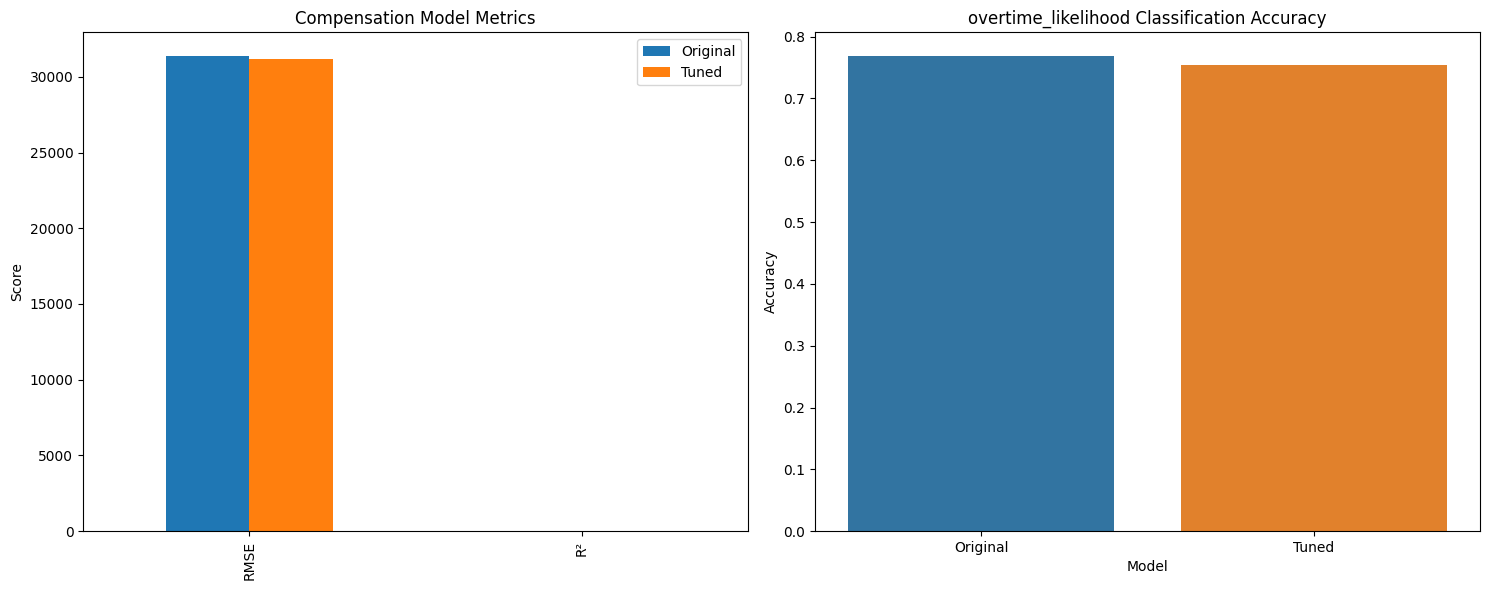

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

def compare_models(original_predictor, tuned_predictor, data, test_size=0.2):
    """Compare performance of original and tuned models"""
    
    # Prepare data
    X, years, y_comp, y_overtime_likelihood = original_predictor.prepare_data(data)
    
    # Fit and get polynomial features and trend predictions
    years_poly = original_predictor.poly.fit_transform(years.values.reshape(-1, 1))
    original_predictor.trend_model.fit(years_poly, y_comp)  # Fit the trend model first
    trend_predictions = original_predictor.trend_model.predict(years_poly)
    X_with_trend = np.hstack((X, trend_predictions.reshape(-1, 1)))
    
    # Split data
    X_train, X_test, y_comp_train, y_comp_test, y_overtime_likelihood_train, y_overtime_likelihood_test = train_test_split(
        X_with_trend, y_comp, y_overtime_likelihood, test_size=test_size, random_state=42
    )
    
    # Train and predict with original model
    original_predictor.comp_model.fit(X_train, y_comp_train)
    original_predictor.overtime_likelihood_model.fit(X_train, y_overtime_likelihood_train)
    
    orig_comp_pred = original_predictor.comp_model.predict(X_test)
    orig_overtime_likelihood_pred = original_predictor.overtime_likelihood_model.predict(X_test)
    
    # Use already tuned model for predictions
    tuned_comp_pred = tuned_predictor.comp_model.predict(X_test)
    tuned_overtime_likelihood_pred = tuned_predictor.overtime_likelihood_model.predict(X_test)
    
    # Calculate metrics
    results = {
        'original': {
            'compensation': {
                'rmse': np.sqrt(mean_squared_error(y_comp_test, orig_comp_pred)),
                'r2': r2_score(y_comp_test, orig_comp_pred),
                'mae': np.mean(np.abs(y_comp_test - orig_comp_pred))
            },
            'overtime_likelihood': {
                'accuracy': accuracy_score(y_overtime_likelihood_test, orig_overtime_likelihood_pred),
                'report': classification_report(y_overtime_likelihood_test, orig_overtime_likelihood_pred)
            }
        },
        'tuned': {
            'compensation': {
                'rmse': np.sqrt(mean_squared_error(y_comp_test, tuned_comp_pred)),
                'r2': r2_score(y_comp_test, tuned_comp_pred),
                'mae': np.mean(np.abs(y_comp_test - tuned_comp_pred))
            },
            'overtime_likelihood': {
                'accuracy': accuracy_score(y_overtime_likelihood_test, tuned_overtime_likelihood_pred),
                'report': classification_report(y_overtime_likelihood_test, tuned_overtime_likelihood_pred)
            }
        }
    }
    
    # Print results
    print("\nCompensation Model Comparison:")
    print(f"{'Metric':<15} {'Original':>12} {'Tuned':>12} {'Improvement':>12}")
    print("-" * 55)
    for metric in ['rmse', 'r2', 'mae']:
        orig = results['original']['compensation'][metric]
        tuned = results['tuned']['compensation'][metric]
        improvement = ((tuned - orig) / orig * 100) if metric != 'rmse' else ((orig - tuned) / orig * 100)
        print(f"{metric.upper():<15} {orig:>12.2f} {tuned:>12.2f} {improvement:>11.2f}%")
    
    print("\novertime_likelihood Classification Comparison:")
    print("\nOriginal Model Classification Report:")
    print(results['original']['overtime_likelihood']['report'])
    print("\nTuned Model Classification Report:")
    print(results['tuned']['overtime_likelihood']['report'])
    
    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Compensation metrics comparison
    metrics_df = pd.DataFrame({
        'Original': [results['original']['compensation']['rmse'],
                    results['original']['compensation']['r2']],
        'Tuned': [results['tuned']['compensation']['rmse'],
                  results['tuned']['compensation']['r2']]
    }, index=['RMSE', 'R²'])
    
    metrics_df.plot(kind='bar', ax=ax1)
    ax1.set_title('Compensation Model Metrics')
    ax1.set_ylabel('Score')
    
    # overtime_likelihood accuracy comparison
    accuracies = pd.DataFrame({
        'Model': ['Original', 'Tuned'],
        'Accuracy': [results['original']['overtime_likelihood']['accuracy'],
                    results['tuned']['overtime_likelihood']['accuracy']]
    })
    sns.barplot(x='Model', y='Accuracy', data=accuracies, ax=ax2)
    ax2.set_title('overtime_likelihood Classification Accuracy')
    
    plt.tight_layout()
    plt.show()
    
    return results

# Run comparison
original_predictor = CompensationPredictor()
comparison_results = compare_models(original_predictor, tuned_predictor, data)